In [23]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
                     'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')
# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]
# データ取得が可能な年度のリスト
years = [2012,2013,2014,2015,2016,2017,2018]
# チーム名頭文字のリスト
teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

In [25]:
# 勝敗を数値（敗：0 勝：1）へ変換する関数
def classify_victory_or_defeat(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [26]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
def combine_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                                      sep=',',names=col_header,usecols=col_num)

            # 引き分けを除外
            for i in range(len(df)):
                if df.loc[i,'Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Result'] = df['Result'].apply(classify_victory_or_defeat)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [27]:
df_all = combine_match_results()

In [28]:
df_all.shape

(11870, 14)

In [29]:
df_all.head(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
0,V,"38,561",1,6,-20,7,0,2,11,0,0,0,0,9
1,H,"24,274",1,6,-21,12,0,1,6,6,0,0,0,6
2,H,"18,719",1,6,-22,6,2,0,7,7,0,1,1,10
3,H,"13,829",1,6,-23,5,1,0,9,4,1,1,1,5
4,H,"10,226",1,6,-24,8,1,1,6,7,0,2,2,3
5,V,"28,709",0,6,-25,9,0,1,3,9,1,4,4,4
6,V,"10,348",1,6,-24,10,2,2,4,8,0,0,0,4
7,H,"15,337",1,6,-25,7,1,0,10,9,0,0,0,7
8,H,"14,062",0,6,-26,4,0,1,7,14,0,7,6,6
9,V,"11,295",0,6,-25,3,0,0,6,10,0,5,3,5


In [30]:
df_all.tail(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
11840,V,"42,851",0,2,2,5,0,1,9,6,1,3,3,7
11841,V,"42,526",1,2,3,7,3,0,7,5,0,0,0,9
11842,H,"46,593",1,2,2,9,0,2,6,15,2,5,5,8
11843,H,"46,638",1,3,1,11,1,4,5,8,0,2,2,6
11844,H,"46,636",0,3,0,9,0,2,6,9,0,5,1,6
11845,H,"46,596",1,2,1,7,0,1,5,8,0,2,2,8
11846,H,"45,924",1,4,0,13,1,0,7,6,0,1,1,9
11847,V,"31,794",1,4,-1,7,1,2,8,8,0,2,1,7
11848,V,"31,819",0,4,-2,6,1,2,6,7,2,5,5,10
11849,V,"31,732",0,4,-1,11,1,2,9,6,1,7,6,8


In [31]:
# 指定されたチーム・年度のDataFrameを作成する関数
def make_dataframe(team, year):
    FILENEME_TEMPLATE = "csv/{y}/{y}_{t}_match_results.csv"
    
    # csvファイルの内容をDataFrameに格納
    df = pd.DataFrame(index=[], columns=[])
    df = pd.read_csv(FILENEME_TEMPLATE.format(y=year, t=team),
                              sep=",", names=col_header, usecols=col_num)
    # 勝敗を数値に変換
    df['Result'] = df['Result'].apply(classify_victory_or_defeat)
    
    return df

In [32]:
df_Bs_2018 = make_dataframe("Bs", 2018)

In [33]:
df_Bs_2018.shape

(143, 14)

In [34]:
len(df_Bs_2018)

143

In [35]:
len(df_Bs_2018.columns)

14

In [36]:
df_Bs_2018.size

2002

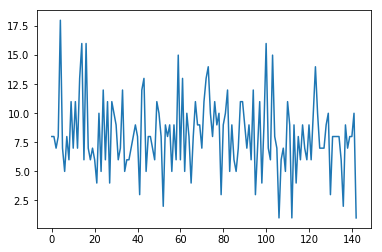

In [37]:
plt.plot(df_Bs_2018['Hits'])